## Toyota_used_car_ML


#### The Feature variables of the given dataset :
**model**: models of the Toyota cars
<br>**year**: Manufacturing year of the year
<br>**transmission**: it converts the engine’s combustion power to momentum which drives the wheels
<br>**mileage**: the number of miles the vehicle has driven
<br>**fuelType**: energy source of the vehicle
<br>**mpg**: miles per gallon the vehicle can travel
<br>**engineSize**: engine size is the volume of fuel and air that can be pushed through a car's cylinders

#### Target Variable:
**price**: the selling price of the car

In [1]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
#sns.set_context('talk')

#### Loading data

In [2]:
df = pd.read_csv(r"D:\OneDrive - greatlakes.edu.in\OFFICE\ML\Datasets\Toyota.csv")

display(df.head())

print(df.shape)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


(6738, 9)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


### Check null values

In [4]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# EDA

## Transmission

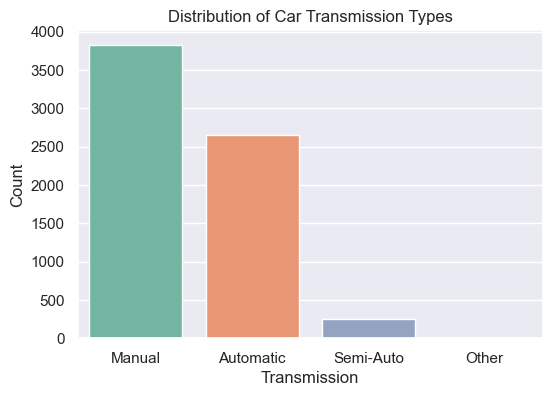

In [5]:
# Set figure size
sns.set(rc={'figure.figsize': (6, 4)})

# Create countplot with a palette
sns.countplot(data=df, x='transmission', palette='Set2')  # Use a Seaborn color palette

# Optional: Add labels and title
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.title('Distribution of Car Transmission Types')

# Show the plot
plt.show()

## Model

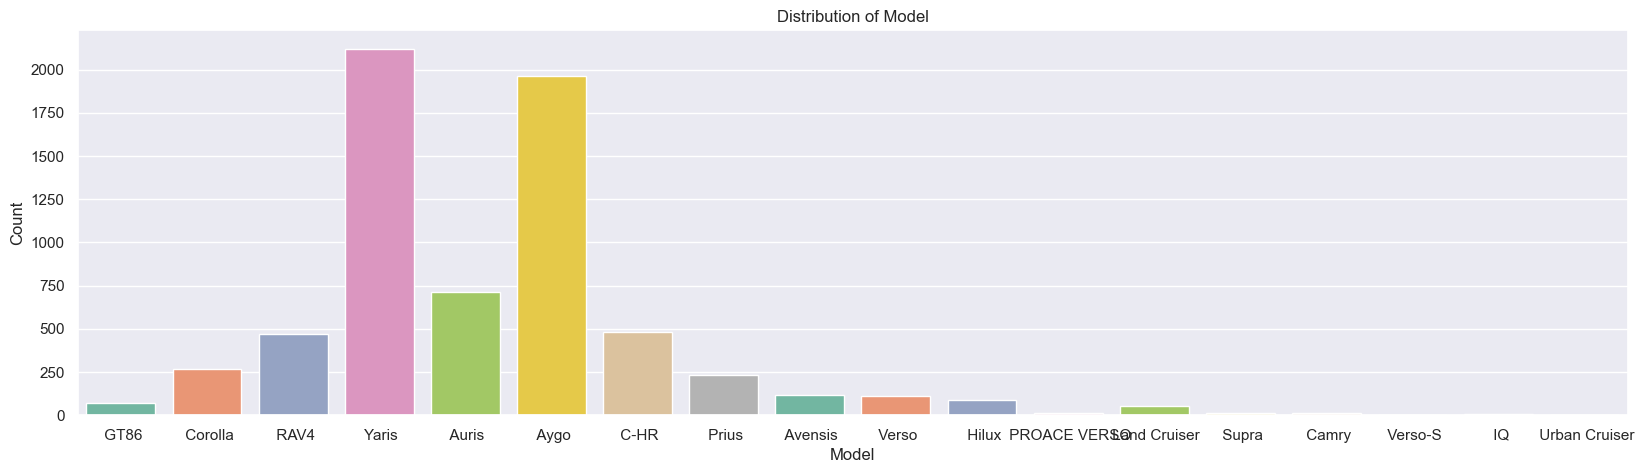

In [6]:
sns.set(rc={'figure.figsize': (20, 5)})
sns.countplot(data=df, x='model', palette='Set2')

# Optional: Add labels and title
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Distribution of Model')

# Show the plot
plt.show()

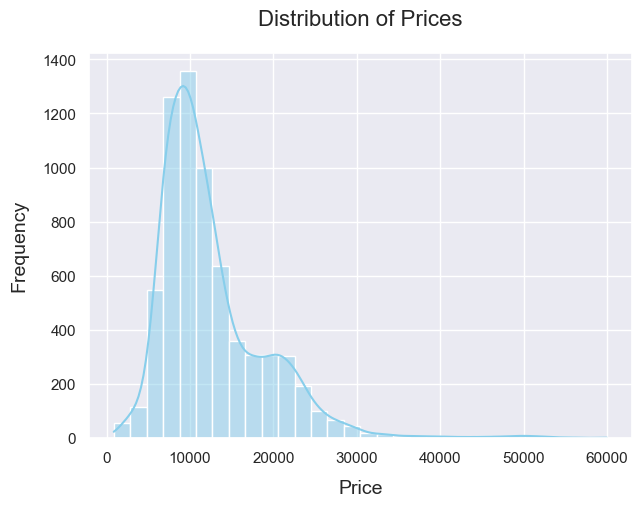

In [7]:
# Set the style
#sns.set(style="whitegrid")

# Create a histogram
plt.figure(figsize=(7, 5))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('Price', fontsize=14, labelpad=10)
plt.ylabel('Frequency', fontsize=14, labelpad=10)
plt.title('Distribution of Prices', fontsize=16, pad=20)

# Show the plot
plt.show()

## Fuel type

* Find distribution of fuel type and other variables

### Label Encoding

In [8]:
 #LE = LabelEncoder()

 df['transmission'] = LE.fit_transform(df['transmission'])
 #df['fuelType'] = LE.fit_transform(df['fuelType'])
 #df['model'] = LE.fit_transform(df['model'])

 #df.head(10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


## Performing One-hot Encoding

In [10]:
# Ensure all OHE columns are numeric

df = pd.get_dummies(df, drop_first=True)
# Ensure all OHE columns are numeric
# makes OHE in 0, 1 rather than TRUE/FALSE
#df = df.astype(int)


df.head()

,year,price,mileage,tax,mpg,engineSize,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,...,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2016,16000,24089,265,36.2,2.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,2017,15995,18615,145,36.2,2.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2015,13998,27469,265,36.2,2.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2017,18998,14736,150,36.2,2.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,2017,17498,36284,145,36.2,2.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    6738 non-null   int64  
 1   price                   6738 non-null   int64  
 2   mileage                 6738 non-null   int64  
 3   tax                     6738 non-null   int64  
 4   mpg                     6738 non-null   float64
 5   engineSize              6738 non-null   float64
 6   model_ Avensis          6738 non-null   bool   
 7   model_ Aygo             6738 non-null   bool   
 8   model_ C-HR             6738 non-null   bool   
 9   model_ Camry            6738 non-null   bool   
 10  model_ Corolla          6738 non-null   bool   
 11  model_ GT86             6738 non-null   bool   
 12  model_ Hilux            6738 non-null   bool   
 13  model_ IQ               6738 non-null   bool   
 14  model_ Land Cruiser     6738 non-null   

In [12]:
df.shape

(6738, 29)

In [13]:
#Display Column names
for col in df.columns: 
    print(col) 

year
price
mileage
tax
mpg
engineSize
model_ Avensis
model_ Aygo
model_ C-HR
model_ Camry
model_ Corolla
model_ GT86
model_ Hilux
model_ IQ
model_ Land Cruiser
model_ PROACE VERSO
model_ Prius
model_ RAV4
model_ Supra
model_ Urban Cruiser
model_ Verso
model_ Verso-S
model_ Yaris
transmission_Manual
transmission_Other
transmission_Semi-Auto
fuelType_Hybrid
fuelType_Other
fuelType_Petrol
